# Back order Prediction

##Data Description
A backorder is the order which could not be fulfilled by the company. Due to high demand of a product, the company was not able to keep up with the delivery of the order. The backordering can lead to upsetting customer as they couldn't get what they ordered and the loyalty will decrease.
Also, company cannot overstock every product in their inventory to avoid such situation.
There has to be a way for the company to know for which products they can face this problem.
So, the company has shared a data file with different input features for each product and it hopes to find a pattern inside this data which can give them some insight.
The data file contains the historical data for some weeks prior to the week we are trying to predict. 
The data has 23 columns including 22 features and one target column.
To model and predict the target, we’ll use the features columns, which are:

sku – 		 	Random ID for the product
national_inv –   	Current inventory level for the part
lead_time – 	 	Transit time for product (if available)
in_transit_qty – 	Amount of product in transit from source
forecast_3_month – 	Forecast sales for the next 3 months
forecast_6_month – 	Forecast sales for the next 6 months
forecast_9_month – 	Forecast sales for the next 9 months
sales_1_month – 	Sales quantity for the prior 1 month time period
sales_3_month – 	Sales quantity for the prior 3 month time period
sales_6_month – 	Sales quantity for the prior 6 month time period
sales_9_month – 	Sales quantity for the prior 9 month time period
min_bank – 		Minimum recommend amount to stock
potential_issue – 	Source issue for part identified
pieces_past_due – 	Parts overdue from source
perf_6_month_avg – 	Source performance for prior 6 month period
perf_12_month_avg – 	Source performance for prior 12 month period
local_bo_qty – 		Amount of stock orders overdue
deck_risk – 		Part risk flag
oe_constraint – 	Part risk flag
ppap_risk – 		Part risk flag
stop_auto_buy – 	Part risk flag
rev_stop – 		Part risk flag
went_on_backorder – 	Product actually went on backorder. This is the target value.

The data has 23 columns including 22 features and one target column.
To model and predict the target, we’ll use the features columns, which are:

sku – 		 	Random ID for the product

national_inv –   	Current inventory level for the part

lead_time – 	 	Transit time for product (if available)

in_transit_qty – 	Amount of product in transit from source

forecast_3_month – 	Forecast sales for the next 3 months

forecast_6_month – 	Forecast sales for the next 6 months

forecast_9_month – 	Forecast sales for the next 9 months

sales_1_month – 	Sales quantity for the prior 1 month time period

sales_3_month – 	Sales quantity for the prior 3 month time period

sales_6_month – 	Sales quantity for the prior 6 month time period

sales_9_month – 	Sales quantity for the prior 9 month time period

min_bank – 		Minimum recommend amount to stock

potential_issue – 	Source issue for part identified

pieces_past_due – 	Parts overdue from source

perf_6_month_avg – 	Source performance for prior 6 month period

perf_12_month_avg – 	Source performance for prior 12 month period

local_bo_qty – 		Amount of stock orders overdue

deck_risk – 		Part risk flag

oe_constraint – 	Part risk flag

ppap_risk – 		Part risk flag

stop_auto_buy – 	Part risk flag

rev_stop – 		Part risk flag

went_on_backorder – 	Product actually went on backorder. This is the target 
value.

## Our aim is to find back orders.
## So we should not classify a order which is originally a non backorder as a backorder in order to gain profit

## Highly imbalance dataset

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
df=pd.read_csv("/content/drive/My Drive/Colab Notebooks/backorder/Train.csv")
df.shape


(1687861, 23)

In [5]:
df.shape

(1687861, 23)

In [6]:
final=df.drop_duplicates(keep='first', inplace=False)
final.shape

(1687861, 23)

In [7]:
final.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [8]:
final.isnull().sum().sum()

100915

In [0]:
df = df.dropna(how='any',axis=0)

In [10]:
df.shape

(1586967, 23)

In [11]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,No,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,No,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [0]:
df.replace(to_replace=['No', 'Yes'], value=[0, 1],inplace=True)

In [13]:
df.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
count,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06,1.586967e+06
mean,4.895098e+02,7.872267e+00,4.547493e+01,1.887439e+02,3.653390e+02,5.362801e+02,5.691140e+01,1.784835e+02,3.522319e+02,5.441272e+02,5.320380e+01,5.683798e-04,2.172666e+00,-1.014934e+00,-5.532225e-01,6.333207e-01,2.032538e-01,1.543825e-04,1.188090e-01,9.753675e-01,2.583545e-04,6.911927e-03
std,3.046168e+04,7.056024e+00,1.309357e+03,5.182992e+03,1.009962e+04,1.482576e+04,1.854775e+03,4.971129e+03,9.679297e+03,1.514871e+04,1.119034e+03,2.383395e-02,2.434021e+02,1.327273e+01,1.144580e+01,3.343933e+01,4.024199e-01,1.242412e-02,3.235638e-01,1.550025e-01,1.607134e-02,8.285021e-02
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.900000e-01,6.900000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.400000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,3.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.400000e-01,8.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,7.800000e+01,9.000000e+00,0.000000e+00,5.000000e+00,1.500000e+01,2.500000e+01,5.000000e+00,1.600000e+01,3.300000e+01,5.000000e+01,3.000000e+00,0.000000e+00,0.000000e+00,9.700000e-01,9.600000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,2.057860e+05,1.000000e+00,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
df.columns

Index(['sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [15]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,1,0,1,1,0,0
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0


In [16]:
df.isnull().sum().max()

0

In [17]:
# The classes are heavily skewed we need to solve this issue later.
print('no backorder', round(df['went_on_backorder'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('went_on_backorder', round(df['went_on_backorder'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

no backorder 99.31 % of the dataset
went_on_backorder 0.69 % of the dataset


**Note:**  Notice how imbalanced is our original dataset! Most of the pts are not a backorder. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most orders are not a backorder. But we don't want our model to assume, we want our model to detect patterns that give signs of backorder!

In [18]:
df['went_on_backorder'].value_counts()[1]

10969

##Distribution

Text(0.5, 1.0, "Class Distributions \n (0: 'no backorder' | 1: 'went_on_backorder')")

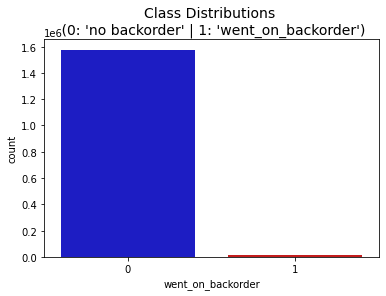

In [19]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('went_on_backorder', data=df, palette=colors)
plt.title("Class Distributions \n (0: 'no backorder' | 1: 'went_on_backorder')", fontsize=14)

In [20]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,1,0,1,1,0,0
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687854,1392420,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,1074.0,111.0,0,0.0,0.85,0.90,1.0,0,0,0,1,0,0
1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [0]:
df=df.reset_index()

In [22]:
df

,index,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
1,3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
2,5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0
3,7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,1,0,1,1,0,0
4,9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586962,1687854,1392420,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,1074.0,111.0,0,0.0,0.85,0.90,1.0,0,0,0,1,0,0
1586963,1687855,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1586964,1687857,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1586965,1687858,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,1,0,0


In [0]:
df=df.drop(columns="index")


In [24]:
df

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.99,0.99,0.0,0,0,0,1,0,0
1,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0.0,0.10,0.13,0.0,0,0,0,1,0,0
2,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0
3,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.00,0.00,0.0,1,0,1,1,0,0
4,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.82,0.87,0.0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586962,1392420,124.0,8.0,140.0,410.0,780.0,1240.0,128.0,464.0,849.0,1074.0,111.0,0,0.0,0.85,0.90,1.0,0,0,0,1,0,0
1586963,1407754,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0,0.0,0.69,0.69,5.0,1,0,0,1,0,0
1586964,1524346,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0,0.0,0.86,0.84,1.0,1,0,0,0,0,1
1586965,1439563,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0,0.0,0.86,0.84,6.0,0,0,0,1,0,0


<h2> Scaling and Distributing </h2>
<a id="distributing"></a>
In this phase of our kernel, we will first scale the columns . On the other hand, we need to also create a sub sample of the dataframe in order to have an equal amount of backorder and Not a backorder cases, helping our algorithms better understand patterns .

<h3> What is a sub-Sample?</h3>
In this scenario, our subsample will be a dataframe with a 50/50 ratio of backorder and Not a backorder cases. Meaning our sub-sample will have the same amount of backorder and Not a backorder cases.

<h3> Why do we create a sub-Sample?</h3>
In the beginning of this notebook we saw that the original dataframe was heavily imbalanced! Using the original dataframe  will cause the following issues:
<ul>
<li><b>Overfitting: </b>Our classification models will assume that in most cases there are  Not a backorder cases! What we want for our model is to be certain when a backorder occurs. </li>

</ul>

<h3>Summary: </h3> 
<ul>

<li> There are 10969<b> cases </b> of backorder in our dataset so we can randomly get 10969 cases of  Not a backorder cases to create our new sub dataframe. </li>
<li>We concat the 10969 cases of backorder and Not a backorder cases, <b>creating a new sub-sample. </b></li>
</ul>

In [0]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()
df['national_inv'] = rob_scaler.fit_transform(df['national_inv'].values.reshape(-1,1))
df['lead_time'] = rob_scaler.fit_transform(df['lead_time'].values.reshape(-1,1))
df['in_transit_qty'] = rob_scaler.fit_transform(df['in_transit_qty'].values.reshape(-1,1))
df['forecast_3_month'] = rob_scaler.fit_transform(df['forecast_3_month'].values.reshape(-1,1))
df['forecast_6_month'] = rob_scaler.fit_transform(df['forecast_6_month'].values.reshape(-1,1))
df['forecast_9_month'] = rob_scaler.fit_transform(df['forecast_9_month'].values.reshape(-1,1))
df['sales_1_month'] = rob_scaler.fit_transform(df['sales_1_month'].values.reshape(-1,1))
df['sales_3_month'] = rob_scaler.fit_transform(df['sales_3_month'].values.reshape(-1,1))
df['sales_6_month'] = rob_scaler.fit_transform(df['sales_6_month'].values.reshape(-1,1))
df['sales_9_month'] = rob_scaler.fit_transform(df['sales_9_month'].values.reshape(-1,1))
df['min_bank'] = rob_scaler.fit_transform(df['min_bank'].values.reshape(-1,1))
df['potential_issue'] = rob_scaler.fit_transform(df['potential_issue'].values.reshape(-1,1))
df['pieces_past_due'] = rob_scaler.fit_transform(df['pieces_past_due'].values.reshape(-1,1))
df['perf_6_month_avg'] = rob_scaler.fit_transform(df['perf_6_month_avg'].values.reshape(-1,1))
df['perf_12_month_avg'] = rob_scaler.fit_transform(df['perf_12_month_avg'].values.reshape(-1,1))
df['local_bo_qty'] = rob_scaler.fit_transform(df['local_bo_qty'].values.reshape(-1,1))
df['deck_risk'] = rob_scaler.fit_transform(df['deck_risk'].values.reshape(-1,1))
df['oe_constraint'] = rob_scaler.fit_transform(df['oe_constraint'].values.reshape(-1,1))
df['ppap_risk'] = rob_scaler.fit_transform(df['ppap_risk'].values.reshape(-1,1))
df['stop_auto_buy'] = rob_scaler.fit_transform(df['stop_auto_buy'].values.reshape(-1,1))
df['rev_stop'] = rob_scaler.fit_transform(df['rev_stop'].values.reshape(-1,1))






In [26]:
df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1043384,-0.162162,0.2,0.0,0.0,0.0,0.0,0.0,-0.0625,-0.090909,-0.08,0.000000,0.0,0.0,0.535714,0.629630,0.0,0.0,0.0,0.0,0.0,0.0,0
1,1043852,-0.094595,0.0,0.0,0.0,0.0,0.0,0.0,-0.0625,-0.090909,-0.08,0.333333,0.0,0.0,-2.642857,-2.555556,0.0,0.0,0.0,0.0,0.0,0.0,0
2,1044198,-0.013514,0.0,0.0,0.0,0.0,0.0,0.0,-0.0625,-0.090909,-0.08,0.000000,0.0,0.0,-0.071429,0.185185,0.0,0.0,0.0,0.0,0.0,0.0,0
3,1045098,-0.108108,-1.2,0.0,0.0,0.0,0.0,0.0,-0.0625,-0.090909,-0.08,0.000000,0.0,0.0,-3.000000,-3.037037,0.0,1.0,0.0,1.0,0.0,0.0,0
4,1045867,-0.135135,0.0,0.0,0.0,0.0,0.0,0.0,-0.0625,-0.090909,-0.08,0.000000,0.0,0.0,-0.071429,0.185185,0.0,0.0,0.0,0.0,0.0,0.0,0


### Splitting the Data (Original DataFrame)
<a id="splitting"></a>
Before proceeding with the <b> Random UnderSampling technique</b> we have to separate the orginal dataframe. <b> Why? for testing purposes, remember although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to test our models on the original testing set not on the testing set created by either of these techniques.</b> The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set.  

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('no back', round(df['went_on_backorder'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('back', round(df['went_on_backorder'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop(columns=["sku",'went_on_backorder'], axis=1)
y = df['went_on_backorder']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
#original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

no back 99.31 % of the dataset
back 0.69 % of the dataset
Train: [ 210908  211006  211077 ... 1586964 1586965 1586966] Test: [     0      1      2 ... 318369 318370 318371]
Train: [      0       1       2 ... 1586964 1586965 1586966] Test: [210908 211006 211077 ... 636326 636327 636328]
Train: [      0       1       2 ... 1586964 1586965 1586966] Test: [447481 447637 447643 ... 953981 953982 953983]
Train: [      0       1       2 ... 1586964 1586965 1586966] Test: [ 719601  719656  719662 ... 1271153 1271154 1271155]
Train: [      0       1       2 ... 1271153 1271154 1271155] Test: [ 998487  998690  998692 ... 1586964 1586965 1586966]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.99308823 0.00691177]
[0.99308743 0.00691257]


## Random Under-Sampling:
<img src="http://contrib.scikit-learn.org/imbalanced-learn/stable/_images/sphx_glr_plot_random_under_sampler_001.png">

In this phase of the project we will implement *"Random Under Sampling"* which basically consists of removing data in order to have a more <b> balanced dataset </b> and thus avoiding our models to overfitting.

#### Steps:
<ul>
<li>The first thing we have to do is determine how <b>imbalanced</b> is our class (use "value_counts()" on the class column to determine the amount for each label)  </li>
<li>Once we determine how many instances are considered <b>backorder </b> (backorder = "1") , we should bring the <b>not a backorder order</b> to the same amount as backorder(assuming we want a 50/50 ratio), this will be equivalent to 10969 cases of backorder and 10969 cases of not a backorder.  </li>
<li> After implementing this technique, we have a sub-sample of our dataframe with a 50/50 ratio with regards to our classes. Then the next step we will implement is to <b>shuffle the data</b> to see if our models can maintain a certain accuracy everytime we run this script.</li>
</ul>

**Note:** The main issue with "Random Under-Sampling" is that we run the risk that our classification models will not perform as accurate as we would like to since there is a great deal of <b>information loss</b> 

In [28]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of backorder classes 10969 rows.
back_df = df.loc[df['went_on_backorder'] == 1]
non_back_df = df.loc[df['went_on_backorder'] == 0][:10969]

normal_distributed_df = pd.concat([back_df, non_back_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
798848,2198216,12.472973,0.0,0.0,0.0,0.0,0.00,2.0,3.1250,3.666667,3.52,8.000000,0.0,0.0,0.321429,0.185185,0.0,0.0,0.0,0.0,0.0,0.0,0
962145,1382828,-0.040541,-1.2,0.0,0.0,0.0,0.00,0.0,-0.0625,-0.090909,-0.08,0.333333,0.0,0.0,0.392857,0.518519,0.0,1.0,0.0,1.0,0.0,0.0,0
602817,1989797,-0.189189,0.0,0.0,6.0,3.8,3.24,0.6,0.9375,0.969697,0.88,3.000000,0.0,0.0,-0.785714,-0.740741,0.0,0.0,0.0,0.0,0.0,0.0,1
853295,2256134,1.783784,-1.2,0.0,0.0,0.0,0.00,0.0,-0.0625,-0.060606,-0.06,0.000000,0.0,0.0,-356.571429,-369.703704,0.0,0.0,0.0,0.0,0.0,0.0,0
559528,1943755,-0.189189,-1.2,0.0,2.4,0.8,0.48,0.0,0.0000,-0.060606,-0.06,0.000000,0.0,0.0,-3.000000,-3.037037,0.0,1.0,0.0,0.0,0.0,0.0,1


In [29]:
new_df.shape

(21938, 23)

##  Equally Distributing and Correlating: 
<a id="correlating"></a>
Now that we have our dataframe correctly balanced, we can go further with our <b>analysis</b> and <b>data preprocessing</b>.

Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: went_on_backorder, dtype: float64


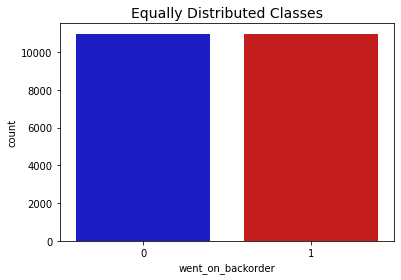

In [30]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['went_on_backorder'].value_counts()/len(new_df))



sns.countplot('went_on_backorder', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

<h3> Correlation Matrices </h3>
Correlation matrices are the essence of understanding our data. We want to know if there are features that influence heavily in whether a specific order is a backorder. However, it is important that we use the correct dataframe (subsample)  in order for us to see which features have a high positive or negative correlation with regards to backorder.




**Note: ** We have to make sure we use the subsample in our correlation matrix or else our correlation matrix will be affected by the high imbalance between our classes. This occurs due to the high class imbalance in the original dataframe.

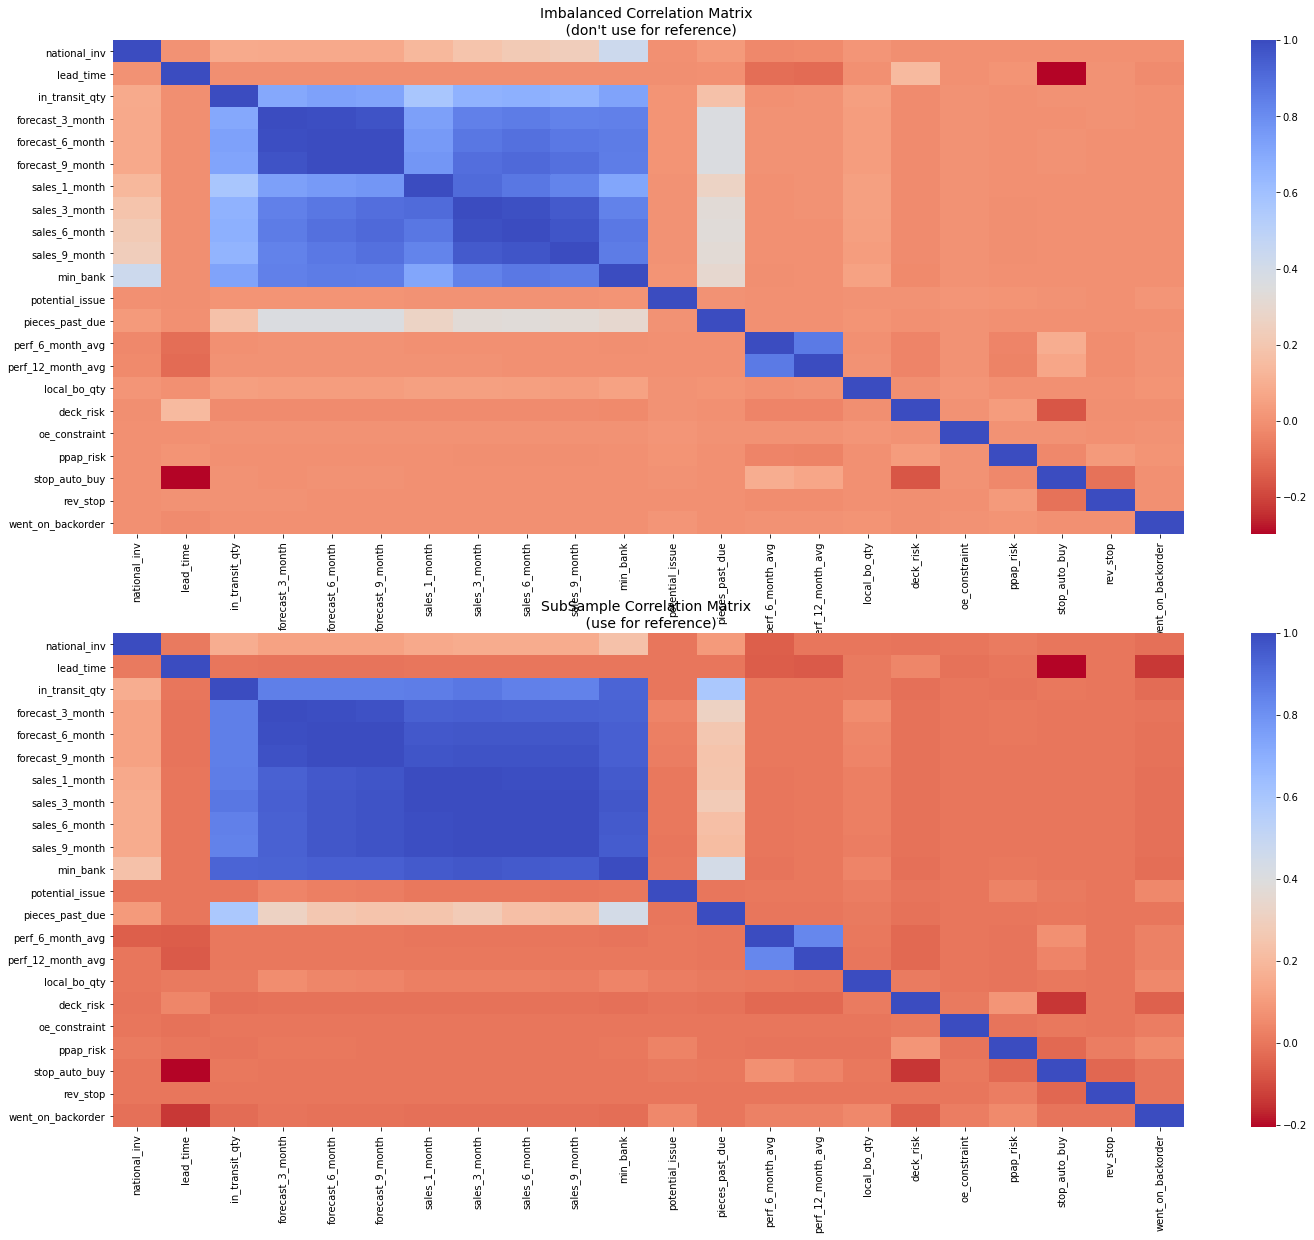

In [0]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

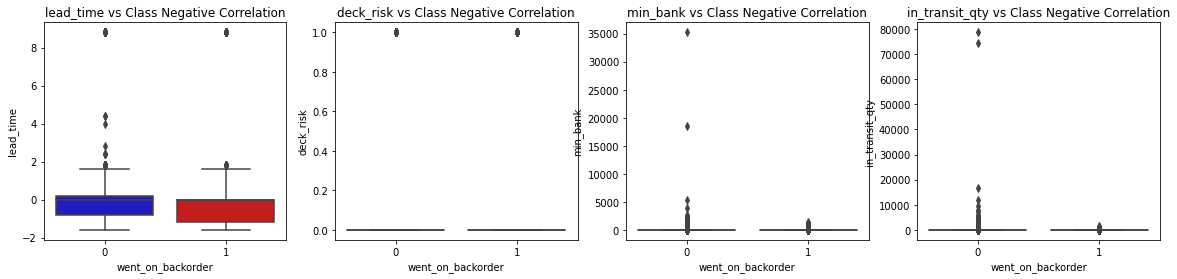

In [0]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="went_on_backorder", y="lead_time", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('lead_time vs Class Negative Correlation')

sns.boxplot(x="went_on_backorder", y="deck_risk", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('deck_risk vs Class Negative Correlation')


sns.boxplot(x="went_on_backorder", y="min_bank", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('min_bank vs Class Negative Correlation')


sns.boxplot(x="went_on_backorder", y="in_transit_qty", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('in_transit_qty vs Class Negative Correlation')

plt.show()

#no strong correlation of features

<h2>Dimensionality Reduction and Clustering: </h2>
<a id="clustering"></a>

<h3>t-SNE:  </h3>

<ul>
<li> <b> Euclidean Distance </b></li>
<li> <b>Conditional Probability</b> </li>
<li><b>Normal and T-Distribution Plots</b> </li>
</ul> 

**Note:** If you want a simple instructive video look at <a href="https://www.youtube.com/watch?v=NEaUSP4YerM"> StatQuest: t-SNE, Clearly Explained </a> by Joshua Starmer



In [0]:

# New_df is from the random undersample data (fewer instances)
X = new_df.drop('went_on_backorder', axis=1)
y = new_df['went_on_backorder']


# T-SNE Implementation
t0 = time.time()
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("T-SNE took {:.2} s".format(t1 - t0))

# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))

# TruncatedSVD
t0 = time.time()
X_reduced_svd = TruncatedSVD(n_components=2, algorithm='randomized', random_state=42).fit_transform(X.values)
t1 = time.time()
print("Truncated SVD took {:.2} s".format(t1 - t0))


T-SNE took 1.8e+02 s
PCA took 0.16 s
Truncated SVD took 0.16 s


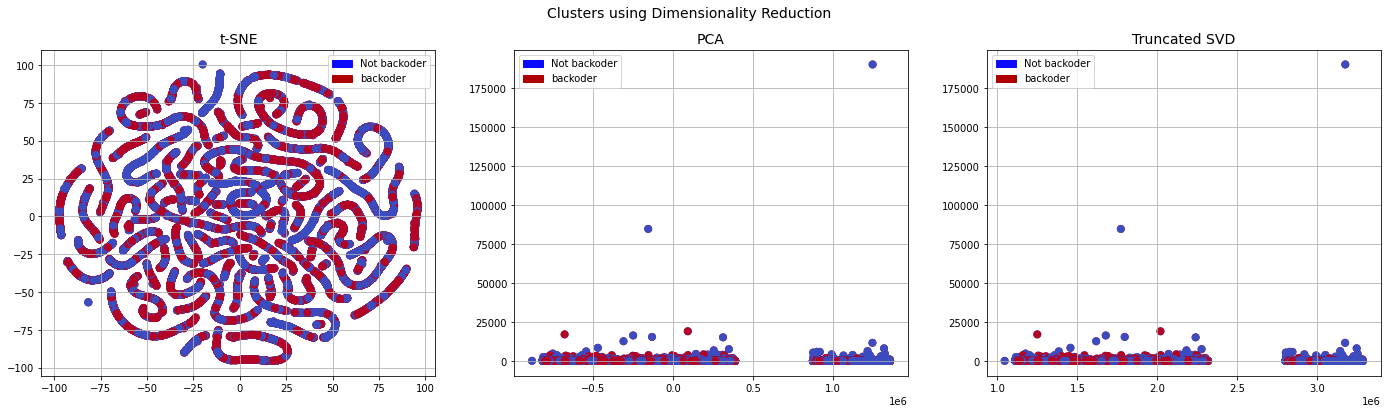

In [0]:


f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(24,6))

f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not backoder')
red_patch = mpatches.Patch(color='#AF0000', label='backoder')


# t-SNE scatter plot
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='Not backoder', linewidths=2)
ax1.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='backoder', linewidths=2)
ax1.set_title('t-SNE', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])


# PCA scatter plot
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not backoder', linewidths=2)
ax2.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='backoder', linewidths=2)
ax2.set_title('PCA', fontsize=14)

ax2.grid(True)

ax2.legend(handles=[blue_patch, red_patch])

# TruncatedSVD scatter plot
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 0), cmap='coolwarm', label='Not backoder', linewidths=2)
ax3.scatter(X_reduced_svd[:,0], X_reduced_svd[:,1], c=(y == 1), cmap='coolwarm', label='backoder', linewidths=2)
ax3.set_title('Truncated SVD', fontsize=14)

ax3.grid(True)

ax3.legend(handles=[blue_patch, red_patch])


<h2> Classifiers (UnderSampling):  </h2>
<a id="classifiers"></a>
In this section we will train classifiers and decide which classifier will be more effective in detecting <b>backorder</b>.  Before we have to split our data into training and testing sets and separate the features from the labels.


<ul>
<li><b> GridSearchCV </b> is used to determine the paremeters that gives the best predictive score for the classifiers. </li>

</ul>

## Learning Curves:
<ul>
<li>The <b>wider the  gap</b>  between the training score and the cross validation score, the more likely your model is <b>overfitting (high variance)</b>.</li>
<li> If the score is low in both training and cross-validation sets</b> this is an indication that our model is <b>underfitting (high bias)</b></li>
<li><b> Logistic Regression Classifier</b>  shows the best score in both training and cross-validating sets.</li>
</ul>

## undersampling before cross validation prone to overfit

In [0]:
# Undersampling before cross validating (prone to overfit)
X = new_df.drop(columns=["sku",'went_on_backorder'], axis=1)
y = new_df['went_on_backorder']

In [0]:
# Our data is already scaled we should split our training and test sets
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
X_train.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
1041558,0.148649,0.0,0.0,0.0,0.000000,0.00,0.0,-0.0625,-0.090909,-0.08,0.000000,0.0,0.0,0.571429,0.629630,0.0,0.0,0.0,0.0,0.0,0.0
325655,-0.108108,-1.2,0.0,0.0,1.333333,0.80,0.0,-0.0625,-0.090909,-0.08,0.000000,0.0,0.0,0.500000,0.592593,0.0,1.0,0.0,0.0,0.0,0.0
2200,-0.189189,0.8,0.0,0.6,0.266667,0.20,0.2,0.1250,0.060606,0.02,0.000000,0.0,0.0,-0.071429,-0.111111,0.0,1.0,0.0,0.0,-1.0,0.0
43784,-0.162162,-1.0,0.0,0.4,0.266667,0.24,0.6,0.1875,0.060606,0.08,0.333333,0.0,0.0,0.500000,0.592593,0.0,0.0,0.0,0.0,0.0,0.0
79335,-0.189189,0.0,0.0,1.2,0.466667,0.32,0.2,0.1250,0.151515,0.12,0.000000,0.0,0.0,0.535714,0.629630,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X_train.shape

(17550, 21)

# Model(without hyperparameter tuning)

In [0]:
# Let's implement simple classifiers

classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [0]:
# Wow our scores are getting even high scores even when applying cross validation.
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 73.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 84.0 % accuracy score
Classifiers:  SVC Has a training score of 56.99999999999999 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 87.0 % accuracy score


# Models with hyperparameter tuning

Logistic Regression

In [46]:
from sklearn.model_selection import GridSearchCV


# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_
log_reg


LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

k nearest neighbour

In [47]:

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_
knears_neighbors

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

SVM

In [0]:


# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_
svc

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Decision Tree

In [49]:


# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_
tree_clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Random Forest

In [0]:
# Use GridSearchCV to find the best parameters.

base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
param_grid={'n_estimators': base_learners, 'max_depth':depths}
model = GridSearchCV(RandomForestClassifier(max_features='sqrt'),param_grid,scoring='roc_auc',n_jobs=-1,cv=3,return_train_score=True)
model.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))
  #max_depth =50
  #base_learners=120
randomf = model.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1000, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.9687532963785245


Scores (Overfitting as we undersample the data before split)

In [0]:
# Overfitting Case
from sklearn.model_selection import cross_val_score
log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

"""svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')"""

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

rf_score = cross_val_score(randomf, X_train, y_train, cv=5)
print('Random forest Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  73.26%
Knears Neighbors Cross Validation Score 84.26%
DecisionTree Classifier Cross Validation Score 82.36%
DecisionTree Classifier Cross Validation Score 82.36%


# Undersampling during crossvalidation(right way of undersampling)

In [0]:
# We will undersample during cross validating
undersample_X = df.drop(columns=["sku",'went_on_backorder'], axis=1)
undersample_y = df['went_on_backorder']



# We will undersample during cross validating


for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []

# Implementing NearMiss Technique 
# Distribution of NearMiss (Just to see how it distributes the labels we won't use these variables)
X_nearmiss, y_nearmiss = NearMiss().fit_sample(undersample_X.values, undersample_y.values)
print('NearMiss Label Distribution: {}'.format(Counter(y_nearmiss)))
# Cross Validating the right way

for train, test in sss.split(undersample_Xtrain, undersample_ytrain):
    undersample_pipeline = imbalanced_make_pipeline(NearMiss(sampling_strategy='majority'),randomf) # SMOTE happens during Cross Validation not before..
    undersample_model = undersample_pipeline.fit(undersample_Xtrain[train], undersample_ytrain[train])
    undersample_prediction = undersample_model.predict(undersample_Xtrain[test])
    
    undersample_accuracy.append(undersample_pipeline.score(original_Xtrain[test], original_ytrain[test]))
    undersample_precision.append(precision_score(original_ytrain[test], undersample_prediction))
    undersample_recall.append(recall_score(original_ytrain[test], undersample_prediction))
    undersample_f1.append(f1_score(original_ytrain[test], undersample_prediction))
    
    try:
         undersample_auc.append(roc_auc_score(original_ytrain[test], undersample_prediction))
    except ValueError:
         pass

    print("ok")

Train: [ 314744  314814  314946 ... 1586964 1586965 1586966] Test: [     0      1      2 ... 317403 317404 317405]
Train: [      0       1       2 ... 1586964 1586965 1586966] Test: [314744 314814 314946 ... 634796 634797 634798]
Train: [      0       1       2 ... 1586964 1586965 1586966] Test: [632564 632768 632833 ... 957273 957284 957349]
Train: [      0       1       2 ... 1586964 1586965 1586966] Test: [ 952136  952137  952138 ... 1270169 1270502 1270576]
Train: [      0       1       2 ... 1270169 1270502 1270576] Test: [1269566 1269567 1269568 ... 1586964 1586965 1586966]
NearMiss Label Distribution: Counter({0: 10969, 1: 10969})
ok
ok
ok
ok
ok


In [0]:
print(undersample_accuracy)
print(undersample_precision)
print(undersample_recall)
print(undersample_f1)
print(undersample_auc)

[0.054325266329283424, 0.0826693972392336, 0.06454916015201938, 0.07782525648346887, 0.06040627929141363]
[0.010211760988245664, 0.009103738809899948, 0.007730769710345515, 0.007561033824331697, 0.0]
[0.9523070957735557, 0.9363084922010398, 0.9489795918367347, 0.9201244813278008, 0.0]
[0.020206840377479576, 0.018032150799180587, 0.015336601293716529, 0.014998816327910986, 0.0]
[0.5025823125683196, 0.5007308437309514, 0.5007206704793008, 0.4980344376423159]


In [0]:
original_Xtest

array([[-0.16216216,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.17567568,  0.8       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.16216216, -1.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.2027027 ,  0.2       ,  0.        , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.64864865,  0.2       , 16.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06756757, -0.8       ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
print(len(undersample_prediction))

253914


In [0]:
undersample_Xtest

array([[-0.13513514,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.06756757,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.08108108,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.82432432,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.12162162,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.2027027 ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

'''svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")'''

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

rf_pred = cross_val_predict(randomf, X_train, y_train, cv=5)

In [0]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
'''print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))'''
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))
print('rf Classifier: ', roc_auc_score(y_train, rf_pred))

Logistic Regression:  0.8058121864991025
KNears Neighbors:  0.8428620505134206
Decision Tree Classifier:  0.8259257936394548
rf Classifier:  0.9116112549906875


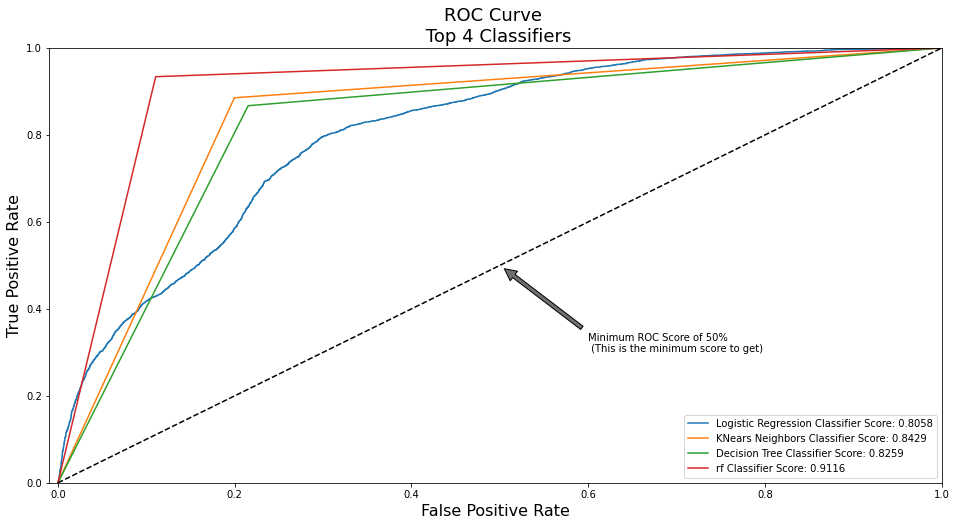

In [0]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
#svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_train, rf_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr,rf_fpr, rf_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot(rf_fpr, rf_tpr, label='rf Classifier Score: {:.4f}'.format(roc_auc_score(y_train, rf_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, tree_fpr, tree_tpr,rf_fpr, rf_tpr)
plt.show()

### Terms:
<ul>
<li><b>True Positives:</b> Correctly Classified backorder </li>
<li><b>False Positives:</b> Incorrectly Classified backorder </li>
<li> <b>True Negative:</b> Correctly Classified Not a backorder </li>
<li> <b>False Negative:</b> Incorrectly Classified Not a backorder</li>
<li><b>Precision: </b>  True Positives/(True Positives + False Positives)  </li>
<li><b> Recall: </b> True Positives/(True Positives + False Negatives)   </li>
<li> Precision as the name says, says how precise (how sure) is our model in detecting backorder while recall is the amount of nackorder cases our model is able to detect.</li>
<li> Precision as the name says, says how precise (how sure) is our model in detecting  order while recall is the amount of backorder cases our model is able to detect.</li>
<li><b>Precision/Recall Tradeoff: </b> The more precise (selective) our model is, the less cases it will detect. 



# Random forest

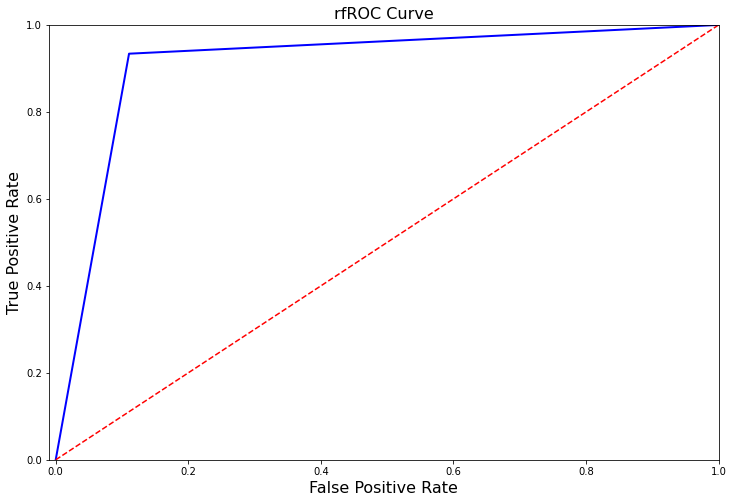

In [0]:
def rf_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('rfROC Curve', fontsize=16)
    plt.plot(rf_fpr, rf_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
rf_roc_curve(rf_fpr, rf_tpr)
plt.show()

In [0]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, rf_pred)

In [0]:
X_train

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
700680,-0.081081,-1.2,0.0,0.0,0.000000,0.00,0.0,0.3125,0.242424,0.30,0.000000,0.0,0.0,0.321429,0.148148,0.0,0.0,0.0,0.0,0.0,0.0
1439854,5.824324,0.0,200.0,220.0,140.000000,108.00,51.6,53.1875,46.303030,43.46,95.666667,0.0,0.0,0.357143,0.444444,15.0,0.0,0.0,0.0,0.0,0.0
765903,-0.148649,-1.2,0.0,0.4,0.933333,0.88,0.6,0.3750,0.484848,0.50,0.000000,0.0,0.0,0.571429,-1.185185,0.0,0.0,0.0,0.0,0.0,0.0
1045635,-0.148649,1.4,0.0,5.2,2.333333,1.40,0.6,1.0625,0.787879,0.80,2.333333,0.0,0.0,0.571429,0.666667,0.0,0.0,0.0,0.0,0.0,0.0
546039,0.094595,0.8,12.0,14.0,8.333333,7.20,2.4,2.8750,3.212121,2.74,9.333333,0.0,0.0,-0.214286,-0.148148,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367976,-0.162162,0.0,0.0,3.0,1.533333,1.24,0.0,0.3125,0.303030,0.28,0.000000,0.0,7.0,-2.392857,-1.814815,0.0,0.0,0.0,0.0,0.0,0.0
583771,-0.027027,0.0,0.0,0.0,0.000000,0.00,0.0,-0.0625,-0.090909,-0.08,0.000000,0.0,0.0,0.214286,0.296296,0.0,0.0,0.0,0.0,0.0,0.0
395650,0.148649,0.0,13.0,9.2,5.200000,4.76,8.4,4.6250,3.696970,3.38,64.333333,0.0,0.0,0.214286,0.444444,13.0,0.0,0.0,0.0,0.0,0.0
840894,-0.189189,-0.6,0.0,92.4,42.066667,25.24,0.0,0.0625,-0.030303,-0.04,13.666667,0.0,0.0,-0.678571,-0.481481,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
X.shape

(21938, 21)

In [0]:
undersample_Xtrain

array([[-0.06756757,  0.8       ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.16216216,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.12162162,  0.2       ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.77027027,  0.        ,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.09459459,  0.8       , 16.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.17567568, -1.2       ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [0]:
df.shape

(1586967, 23)

In [0]:
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
rf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
rf.fit(X_train, y_train)

print(model.best_estimator_)
print(model.score(X_test, y_test))
y_pred = rf.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=500, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.7144886277931705
---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00
---------------------------------------------------------------------------------------------------------------------------------------
-----------------------------------------------------------------------

In [0]:
undersample_y_score = rf.predict(original_Xtest)

In [0]:

from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(undersample_average_precision))

Average precision-recall score: 0.06


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =0.06')

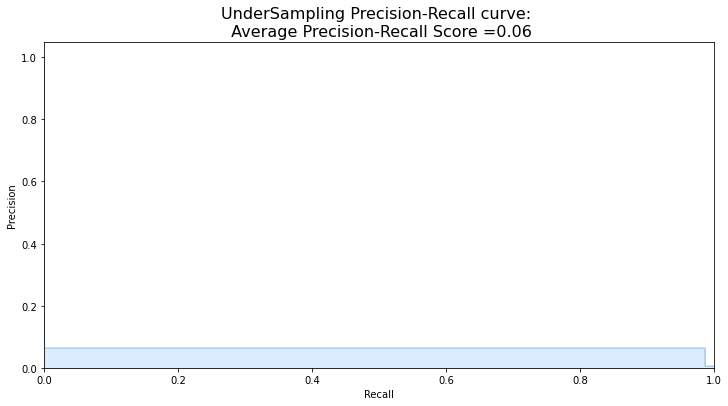

In [0]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

Undersampling shows a very poor performance on the test data when we undersample during cross validation

### SMOTE Technique (Over-Sampling):
<a id="smote"></a>
<img src="https://raw.githubusercontent.com/rikunert/SMOTE_visualisation/master/SMOTE_R_visualisation_3.png", width=800>
<b>SMOTE</b> stands for Synthetic Minority Over-sampling Technique.  Unlike Random UnderSampling, SMOTE creates new synthetic points in order to have an equal balance of the classes. This is another alternative for solving the "class imbalance problems". <br><br>


<b> Understanding SMOTE: </b>
<ul>
<li> <b> Solving the Class Imbalance: </b> SMOTE creates synthetic points from the minority class in order to reach an equal balance between the minority and majority class. </li>
<li><b>Location of the synthetic points: </b>   SMOTE picks the distance between the closest neighbors of the minority class, in between these distances it creates synthetic points. </li>
<li> <b>Final Effect:  </b> More information is retained since we didn't have to delete any rows unlike in random undersampling.</li>
<li><b> Accuracy || Time Tradeoff: </b> Although it is likely that SMOTE will be more accurate than random under-sampling, it will take more time to train since no rows are eliminated as previously stated.</li>

</ul>

### Cross Validation Overfitting Mistake:
## Overfitting during Cross Validation:  
In our undersample analysis I want to show you a common mistake I made that I want to share with all of you. It is simple, if you want to undersample or oversample your data you should not do it before cross validating. Why because you will be directly influencing the validation set before implementing cross-validation causing a "data leakage" problem. <b>In the following section you will see amazing precision and recall scores but in reality our data is overfitting!</b>
### The Wrong Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/2639934.jpg?401"><br>

As mentioned previously, if we get the minority class ("backorder) in our case, and create the synthetic points before cross validating we have a certain influence on the "validation set" of the cross validation process. Remember how cross validation works, let's assume we are splitting the data into 5 batches, 4/5 of the dataset will be the training set while 1/5 will be the validation set. The test set should not be touched! For that reason, we have to do the creation of synthetic datapoints "during" cross-validation and not before, just like below: <br>


### The Right Way:
<img src="https://www.marcoaltini.com/uploads/1/3/2/3/13234002/9101820.jpg?372"> <br>
As you see above, SMOTE occurs "during" cross validation and not "prior" to the cross validation process. Synthetic data are created only for the training set without affecting the validation set.






In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

print('no back', round(df['went_on_backorder'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('back', round(df['went_on_backorder'].value_counts()[1]/len(df) * 100,2), '% of the dataset')
df=df.sample(n=300000, random_state=1)

X = df.drop(columns=["sku",'went_on_backorder'], axis=1)
y = df['went_on_backorder']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
#original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))





no back 99.31 % of the dataset
back 0.69 % of the dataset
Train: [ 59985  59986  59987 ... 299997 299998 299999] Test: [    0     1     2 ... 61983 62083 62099]
Train: [     0      1      2 ... 299997 299998 299999] Test: [ 59985  59986  59987 ... 121368 121454 121587]
Train: [     0      1      2 ... 299997 299998 299999] Test: [119985 119986 119987 ... 180459 180496 180519]
Train: [     0      1      2 ... 299997 299998 299999] Test: [179995 179996 179997 ... 240002 240003 240004]
Train: [     0      1      2 ... 240002 240003 240004] Test: [239273 239358 239379 ... 299997 299998 299999]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.993 0.007]
[0.993 0.007]


In [35]:
X.shape

(300000, 21)

In [36]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, RandomizedSearchCV


print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
rf= RandomForestClassifier(max_features="sqrt")
base_learners = [20,40,60,80,100,120]
depths=[1,5,10,50,100,500,1000]
rf_params={'n_estimators': base_learners, 'max_depth':depths}




rand_log_reg = RandomizedSearchCV(rf, rf_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way

for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    print("ok")
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 240000 | Length of y (train): 240000
Length of X (test): 60000 | Length of y (test): 60000
ok
ok
ok
ok
ok
---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9636166666666666
precision: 0.2221638560242436
recall: 0.4404761904761905
f1: 0.21190148499124853
---------------------------------------------------------------------------------------------------------------------------------------


Prediction on unseen data 

In [38]:

labels = ['No back', 'back']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

              precision    recall  f1-score   support

     No back       0.99      1.00      1.00     59580
        back       0.30      0.20      0.24       420

    accuracy                           0.99     60000
   macro avg       0.65      0.60      0.62     60000
weighted avg       0.99      0.99      0.99     60000



In [0]:
y_score = best_est.predict(original_Xtest)

In [40]:

from sklearn.metrics import average_precision_score
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(average_precision))

Average precision-recall score: 0.07


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =0.07')

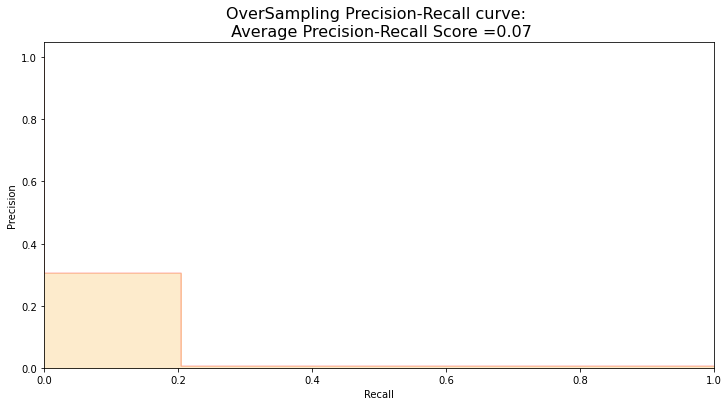

In [41]:

from sklearn.metrics import precision_recall_curve
fig = plt.figure(figsize=(12,6))


precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [0]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(ratio='minority', random_state=42)
#Xsm_train, ysm_train = sm.fit_sample(X_train, y_train)


# This will be the data were we are going to 
#
Xsm_train, ysm_train = sm.fit_sample(original_Xtrain, original_ytrain)


In [43]:
Xsm_train.shape

(476640, 21)

In [44]:
# We Improve the score by 2% points approximately 


# randon forest
t0 = time.time()
rf_sm = rand_log_reg.best_estimator_
rf_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :197.42068672180176 sec


# Test Data with Random forest

In [0]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using undersampling technique
y_pred_log_reg =log_reg.predict(original_Xtest)


y_pred_knear = knears_neighbors.predict(original_Xtest)
'''y_pred_svc = svc.predict(X_test)'''
y_pred_tree = tree_clf.predict(original_Xtest)


#Random forest with oversampling
y_pred_rf = rf_sm.predict(original_Xtest)



log_reg_cf = confusion_matrix(original_ytest, y_pred_log_reg)
kneighbors_cf = confusion_matrix(original_ytest, y_pred_knear)
'''svc_cf = confusion_matrix(y_test, y_pred_svc)'''
tree_cf = confusion_matrix(original_ytest, y_pred_tree)
rf_cf = confusion_matrix(original_ytest, y_pred_rf)





plt.show()

In [0]:
import itertools

# Create a confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[48404 11176]
 [   31   389]]
Confusion matrix, without normalization
[[59580     0]
 [    0   420]]


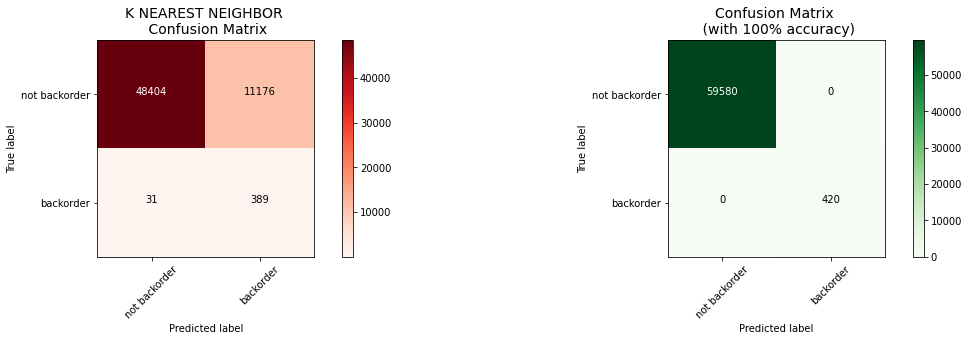

In [52]:
from sklearn.metrics import confusion_matrix
kncm = confusion_matrix(original_ytest, y_pred_knear)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['not backorder', 'backorder']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(kncm, labels, title="K NEAREST NEIGHBOR \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [53]:
print(classification_report(original_ytest, y_pred_knear, target_names=labels))

               precision    recall  f1-score   support

not backorder       1.00      0.81      0.90     59580
    backorder       0.03      0.93      0.06       420

     accuracy                           0.81     60000
    macro avg       0.52      0.87      0.48     60000
 weighted avg       0.99      0.81      0.89     60000



Confusion matrix, without normalization
[[37565 22015]
 [   69   351]]
Confusion matrix, without normalization
[[59580     0]
 [    0   420]]


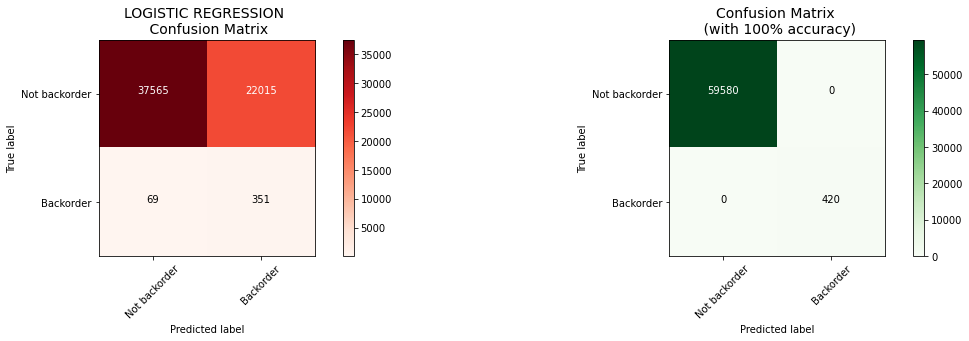

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original_ytest, y_pred_log_reg)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Not backorder', 'Backorder']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(cm, labels, title="LOGISTIC REGRESSION \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [55]:
print(classification_report(original_ytest, y_pred_log_reg, target_names=labels))

               precision    recall  f1-score   support

Not backorder       1.00      0.63      0.77     59580
    Backorder       0.02      0.84      0.03       420

     accuracy                           0.63     60000
    macro avg       0.51      0.73      0.40     60000
 weighted avg       0.99      0.63      0.77     60000



Confusion matrix, without normalization
[[48353 11227]
 [   92   328]]
Confusion matrix, without normalization
[[59580     0]
 [    0   420]]


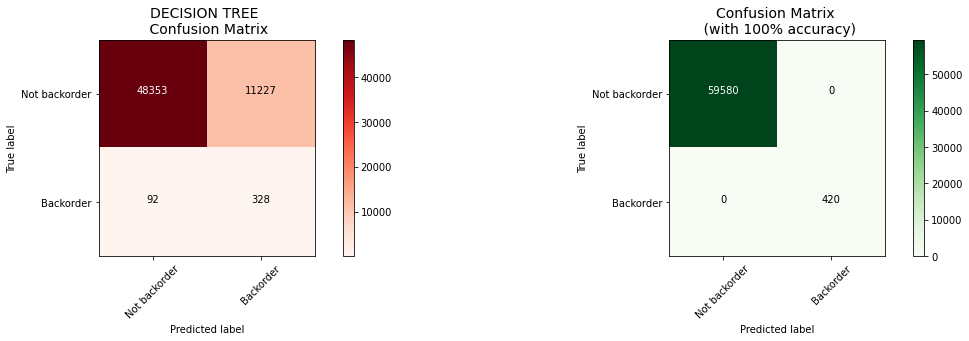

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original_ytest, y_pred_tree)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Not backorder', 'Backorder']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(cm, labels, title="DECISION TREE \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [57]:
print(classification_report(original_ytest, y_pred_tree, target_names=labels))

               precision    recall  f1-score   support

Not backorder       1.00      0.81      0.90     59580
    Backorder       0.03      0.78      0.05       420

     accuracy                           0.81     60000
    macro avg       0.51      0.80      0.47     60000
 weighted avg       0.99      0.81      0.89     60000



## random forest with oversampling during crossval(best estimator extracted during smote)

Confusion matrix, without normalization
[[59404   176]
 [  331    89]]
Confusion matrix, without normalization
[[59580     0]
 [    0   420]]


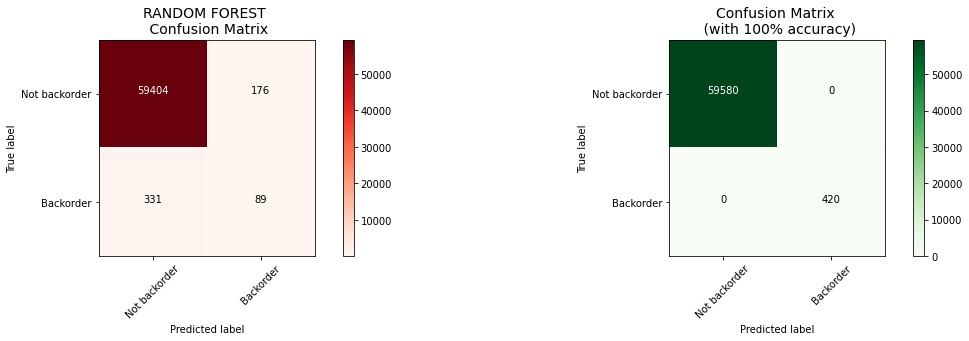

In [78]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(original_ytest, y_pred_rf)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Not backorder', 'Backorder']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(cm, labels, title="RANDOM FOREST \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [79]:
print(classification_report(original_ytest, y_pred_rf, target_names=labels))

               precision    recall  f1-score   support

Not backorder       0.99      1.00      1.00     59580
    Backorder       0.34      0.21      0.26       420

     accuracy                           0.99     60000
    macro avg       0.67      0.60      0.63     60000
 weighted avg       0.99      0.99      0.99     60000



as you can see the oversampled classifier performs better than other classifier 
and recall of not a backorder is increased

## TESTING DATA ON THE TEST SET HAVING BALANCED PROPORTION CLASSES

In [0]:
from sklearn.metrics import confusion_matrix

# Logistic Regression fitted using undersampling technique
y_pred_log_regbal=log_reg.predict(X_test)


y_pred_knearbal = knears_neighbors.predict(X_test)
'''y_pred_svc = svc.predict(X_test)'''
y_pred_treebal = tree_clf.predict(X_test)


#Random forest with oversampling
y_pred_rfbal = rf_sm.predict(X_test)



Confusion matrix, without normalization
[[1725  384]
 [ 240 2039]]
Confusion matrix, without normalization
[[2109    0]
 [   0 2279]]


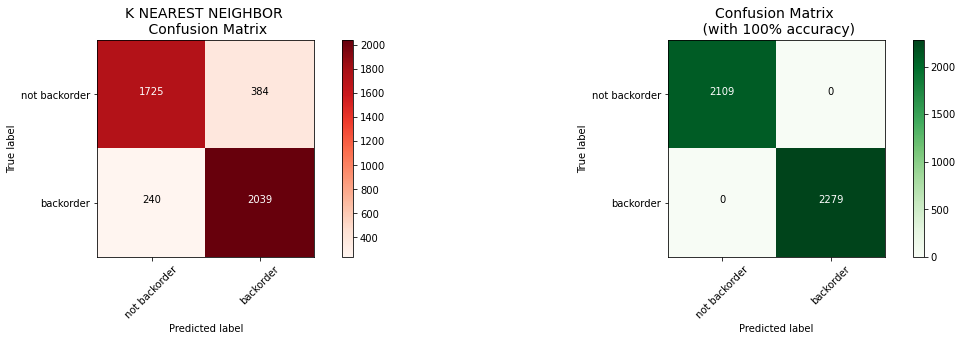

In [85]:
from sklearn.metrics import confusion_matrix
knncmb = confusion_matrix(y_test, y_pred_knearbal)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['not backorder', 'backorder']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(knncmb, labels, title="K NEAREST NEIGHBOR \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [82]:
print(classification_report(y_test, y_pred_knearbal, target_names=labels))

               precision    recall  f1-score   support

Not backorder       0.88      0.82      0.85      2109
    Backorder       0.84      0.89      0.87      2279

     accuracy                           0.86      4388
    macro avg       0.86      0.86      0.86      4388
 weighted avg       0.86      0.86      0.86      4388



Confusion matrix, without normalization
[[2101    8]
 [1413  866]]
Confusion matrix, without normalization
[[2109    0]
 [   0 2279]]


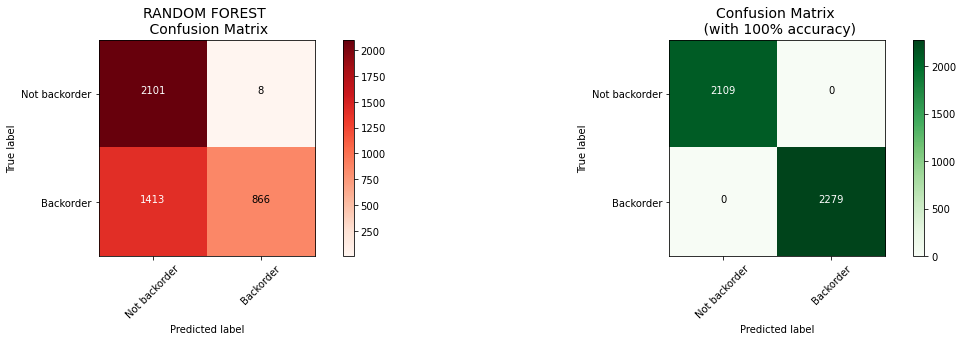

In [86]:
from sklearn.metrics import confusion_matrix
cmrf = confusion_matrix(y_test, y_pred_rfbal)
actual_cm = confusion_matrix(y_test, y_test)
labels = ['Not backorder', 'Backorder']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(cmrf, labels, title="RANDOM FOREST \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [87]:
print(classification_report(y_test, y_pred_rfbal, target_names=labels))

               precision    recall  f1-score   support

Not backorder       0.60      1.00      0.75      2109
    Backorder       0.99      0.38      0.55      2279

     accuracy                           0.68      4388
    macro avg       0.79      0.69      0.65      4388
 weighted avg       0.80      0.68      0.64      4388



#REPORT AFTER OVERSAMPLING DURING CROSS VAL TO AVOID DATA LEAKAGE

In [62]:

print('rf Classifier oversampling:')
print(classification_report(original_ytest, y_pred_rf))


rf Classifier oversampling:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     59580
           1       0.34      0.21      0.26       420

    accuracy                           0.99     60000
   macro avg       0.67      0.60      0.63     60000
weighted avg       0.99      0.99      0.99     60000



In [67]:
randomf=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1000, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
randomf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=1000, max_features='sqrt',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:

from sklearn.metrics import accuracy_score


y_pred = randomf.predict(original_Xtest)
undersample_score = accuracy_score(original_ytest, y_pred)



y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,0.89495
1,Oversampling (SMOTE),0.99155


#NEURAL NETWORK

In [88]:
import keras
from keras import backend as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

n_inputs = X_train.shape[1]

undersample_model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')
])

Using TensorFlow backend.


In [89]:
undersample_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 21)                462       
_________________________________________________________________
dense_2 (Dense)              (None, 32)                704       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 1,232
Trainable params: 1,232
Non-trainable params: 0
_________________________________________________________________


In [0]:
undersample_model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [91]:
undersample_model.fit(X_train, y_train, validation_split=0.2, batch_size=25, epochs=20, shuffle=True, verbose=2)

Train on 14040 samples, validate on 3510 samples
Epoch 1/20
 - 1s - loss: 0.7922 - accuracy: 0.7308 - val_loss: 0.5695 - val_accuracy: 0.8040
Epoch 2/20
 - 1s - loss: 0.5467 - accuracy: 0.8015 - val_loss: 0.4613 - val_accuracy: 0.8188
Epoch 3/20
 - 1s - loss: 0.5190 - accuracy: 0.8105 - val_loss: 0.4984 - val_accuracy: 0.8271
Epoch 4/20
 - 1s - loss: 0.4450 - accuracy: 0.8231 - val_loss: 0.4041 - val_accuracy: 0.8365
Epoch 5/20
 - 1s - loss: 0.4488 - accuracy: 0.8332 - val_loss: 0.4838 - val_accuracy: 0.8245
Epoch 6/20
 - 1s - loss: 0.4834 - accuracy: 0.8319 - val_loss: 0.6947 - val_accuracy: 0.8074
Epoch 7/20
 - 1s - loss: 0.4148 - accuracy: 0.8396 - val_loss: 0.3840 - val_accuracy: 0.8538
Epoch 8/20
 - 1s - loss: 0.3894 - accuracy: 0.8472 - val_loss: 0.3867 - val_accuracy: 0.8484
Epoch 9/20
 - 1s - loss: 0.3792 - accuracy: 0.8491 - val_loss: 0.4273 - val_accuracy: 0.8433
Epoch 10/20
 - 1s - loss: 0.4007 - accuracy: 0.8489 - val_loss: 0.4117 - val_accuracy: 0.8490
Epoch 11/20
 - 1s - 

In [0]:
undersample_predictions = undersample_model.predict(original_Xtest, batch_size=200, verbose=0)

In [0]:
undersample_backorder_predictions = undersample_model.predict_classes(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[50183  9397]
 [   60   360]]
Confusion matrix, without normalization
[[59580     0]
 [    0   420]]


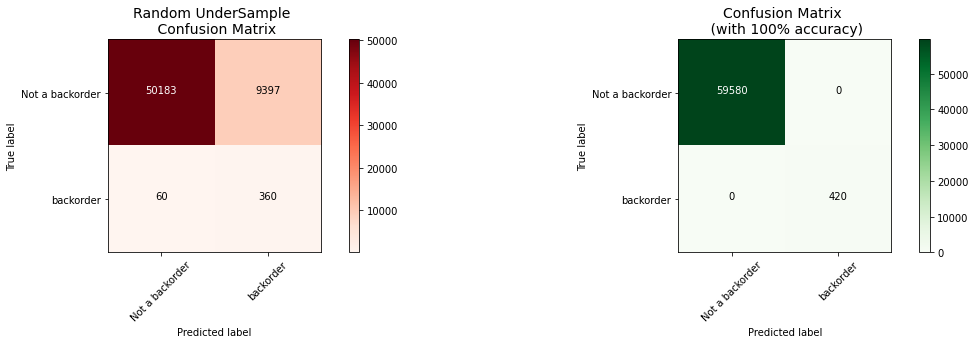

In [94]:
from sklearn.metrics import confusion_matrix
undersample_cm = confusion_matrix(original_ytest, undersample_backorder_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['Not a backorder', 'backorder']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(undersample_cm, labels, title="Random UnderSample \n Confusion Matrix", cmap=plt.cm.Reds)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [0]:
from keras.layers import Dropout
n_inputs = Xsm_train.shape[1]
model=Sequential()
model.add(Dense(1028, input_dim=n_inputs, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(32, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [0]:
model.compile(Adam(lr=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [97]:
history=model.fit(Xsm_train, ysm_train, validation_split=0.2, batch_size=300, epochs=20, shuffle=True, verbose=2)

Train on 381312 samples, validate on 95328 samples
Epoch 1/20
 - 46s - loss: 0.5516 - accuracy: 0.8157 - val_loss: 0.3670 - val_accuracy: 0.8855
Epoch 2/20
 - 45s - loss: 0.3236 - accuracy: 0.8692 - val_loss: 0.2637 - val_accuracy: 0.9290
Epoch 3/20
 - 45s - loss: 0.2925 - accuracy: 0.8828 - val_loss: 0.2739 - val_accuracy: 0.9314
Epoch 4/20
 - 48s - loss: 0.2635 - accuracy: 0.8941 - val_loss: 0.2234 - val_accuracy: 0.9375
Epoch 5/20
 - 47s - loss: 0.2399 - accuracy: 0.9043 - val_loss: 0.2370 - val_accuracy: 0.9329
Epoch 6/20
 - 45s - loss: 0.2264 - accuracy: 0.9097 - val_loss: 0.1658 - val_accuracy: 0.9589
Epoch 7/20
 - 47s - loss: 0.2195 - accuracy: 0.9127 - val_loss: 0.1781 - val_accuracy: 0.9626
Epoch 8/20
 - 49s - loss: 0.2119 - accuracy: 0.9180 - val_loss: 0.1603 - val_accuracy: 0.9637
Epoch 9/20
 - 48s - loss: 0.2031 - accuracy: 0.9204 - val_loss: 0.1389 - val_accuracy: 0.9743
Epoch 10/20
 - 46s - loss: 0.1936 - accuracy: 0.9249 - val_loss: 0.1684 - val_accuracy: 0.9630
Epoch 11

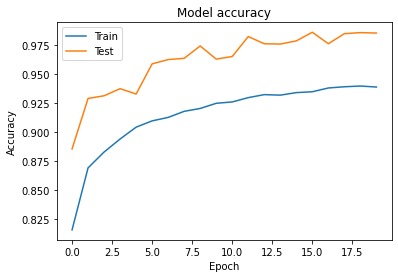

In [99]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [0]:
oversample_predictions = model.predict(original_Xtest, batch_size=200, verbose=0)

In [0]:
oversample_backorder_predictions = model.predict_classes(original_Xtest, batch_size=200, verbose=0)

Confusion matrix, without normalization
[[55640  3940]
 [  135   285]]
Confusion matrix, without normalization
[[59580     0]
 [    0   420]]


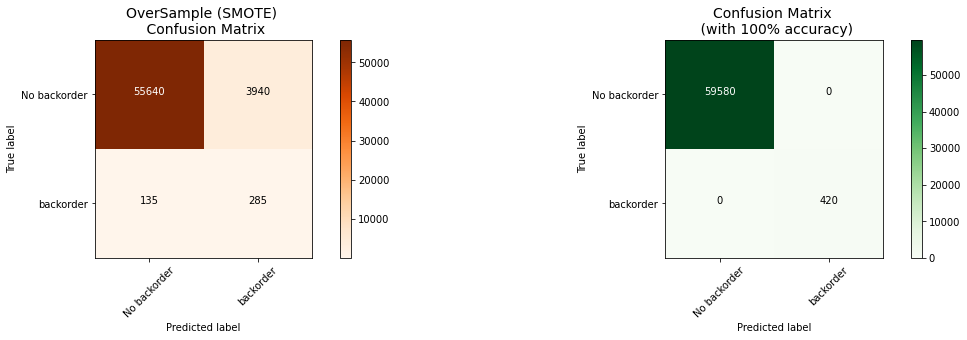

In [102]:
from sklearn.metrics import confusion_matrix
oversample_smote = confusion_matrix(original_ytest, oversample_backorder_predictions)
actual_cm = confusion_matrix(original_ytest, original_ytest)
labels = ['No backorder', 'backorder']

fig = plt.figure(figsize=(16,8))

fig.add_subplot(221)
plot_confusion_matrix(oversample_smote, labels, title="OverSample (SMOTE) \n Confusion Matrix", cmap=plt.cm.Oranges)

fig.add_subplot(222)
plot_confusion_matrix(actual_cm, labels, title="Confusion Matrix \n (with 100% accuracy)", cmap=plt.cm.Greens)

In [103]:
print('Neural network Classifier:')
print(classification_report(original_ytest,oversample_backorder_predictions))

Neural network Classifier:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     59580
           1       0.07      0.68      0.12       420

    accuracy                           0.93     60000
   macro avg       0.53      0.81      0.54     60000
weighted avg       0.99      0.93      0.96     60000



Conclusion:
Implementing SMOTE on our imbalanced dataset helped us with the imbalance of our labels . Nevertheless, I still have to state that sometimes the model on the oversampled dataset predicts less correct backorders than our model using the undersample dataset. Also, to note in our undersample data our model is unable to detect for a large number of cases  correctly and instead, misclassifies those not a backorder cases as backorder cases. Imagine that people that were making regular order got their order cancelled due to the reason that our model classified that order as a backorder , this will be a huge disadvantage for the company. The number of customer complaints and customer disatisfaction will increase.